<h3 style = "text-align:center; 
font-weight: bold;
border: 5px solid gold; 
color:gold; 
font-size:30px;
background: rgb(2,0,36);
background: linear-gradient(90deg, rgba(2,0,36,1) 0%, rgba(9,9,121,1) 60%, rgba(0,212,255,1) 100%);
">IMPORTS</h3>

In [70]:
import warnings
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings("ignore")
plt.style.use("_mpl-gallery-nogrid")

scaler = StandardScaler()

In [71]:
df = pd.read_csv('datasets\insurance.csv')

<h3 style = "text-align:center; 
font-weight: bold;
border: 5px solid gold; 
color:gold; 
font-size:30px;
background: rgb(2,0,36);
background: linear-gradient(90deg, rgba(2,0,36,1) 0%, rgba(9,9,121,1) 60%, rgba(0,212,255,1) 100%);
">EXPLORATORY DATA ANALYSIS</h3>

In [72]:
df[df.duplicated()]
df = df.drop_duplicates()

In [73]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [74]:
print('--------No of Unique Values---------')
print('Column   :   Number of Unique Values')
print('------------------------------------')
for col in df.columns:
    unique_num = len(df[col].value_counts())
    print(f'{col} : {unique_num}')
print('------------------------------------')

--------No of Unique Values---------
Column   :   Number of Unique Values
------------------------------------
age : 47
sex : 2
bmi : 548
children : 6
smoker : 2
region : 4
charges : 1337
------------------------------------


In [75]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


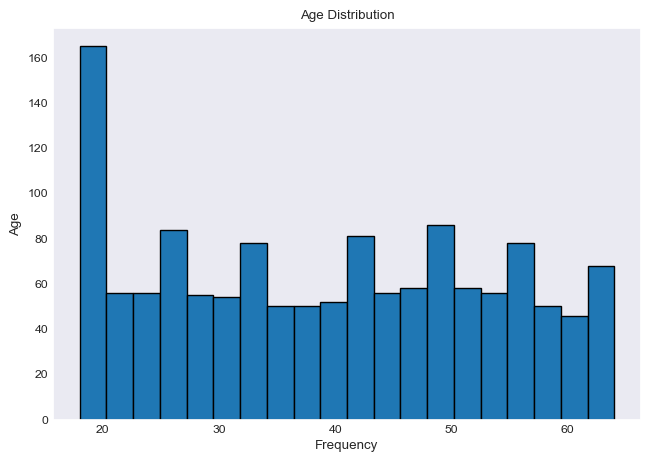

In [76]:
plt.figure(figsize=(6, 4))
plt.hist(df["age"], bins=20, edgecolor="black")
plt.xlabel("Frequency")
plt.ylabel("Age")
plt.title("Age Distribution")
plt.show()

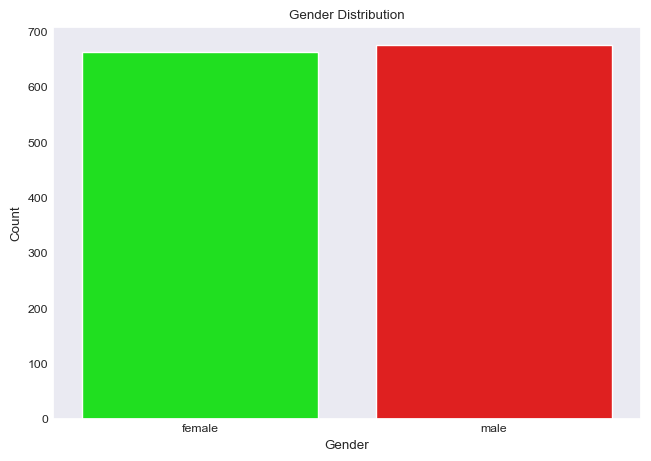

In [77]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sex', palette=['#00FF00',"#FF0000"])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution")
plt.show()

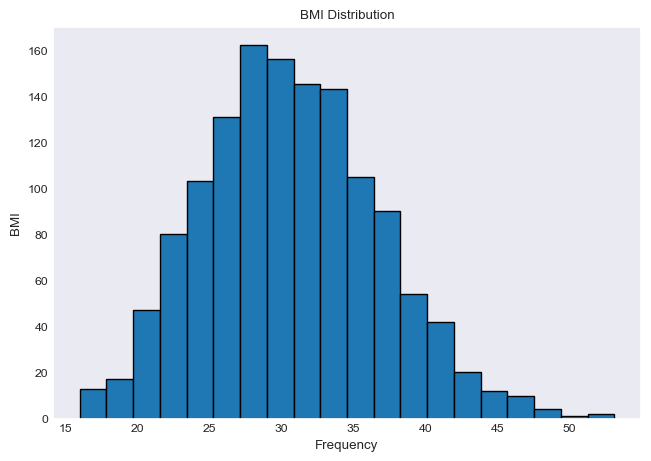

In [78]:
plt.figure(figsize=(6, 4))
plt.hist(df["bmi"], bins=20, edgecolor="black")
plt.xlabel("Frequency")
plt.ylabel("BMI")
plt.title("BMI Distribution")
plt.show()

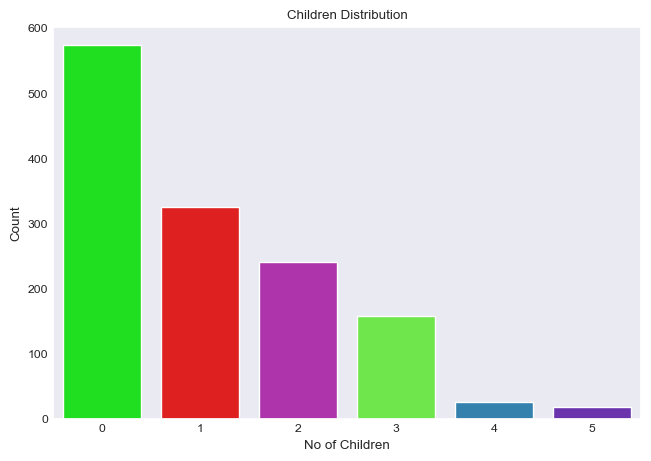

In [79]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='children',palette=['#00FF00',"#FF0000","#C120BF","#61FF33","#2087C1","#6920C1"])
plt.xlabel("No of Children")
plt.ylabel("Count")
plt.title("Children Distribution")
plt.show()

[]

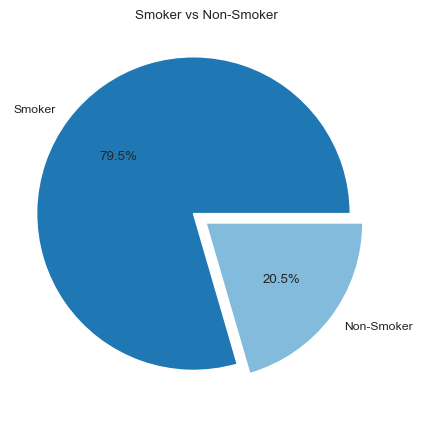

In [80]:
plt.figure(figsize=(6,4))
plt.pie(df['smoker'].value_counts(),autopct='%1.1f%%',explode= [0.1, 0],labels=['Smoker','Non-Smoker'])
plt.title('Smoker vs Non-Smoker')
plt.plot()

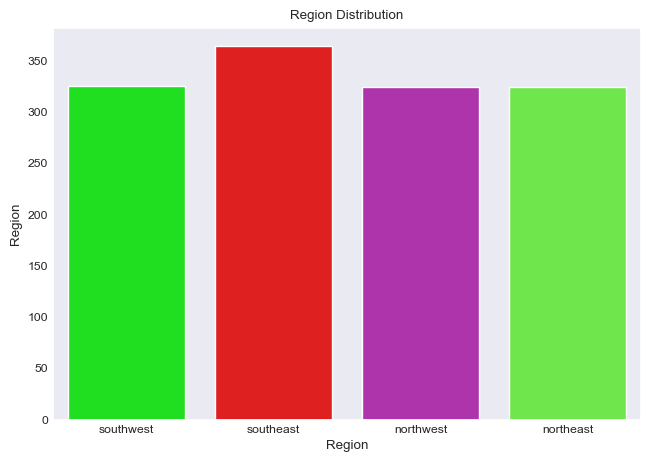

In [81]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='region',palette=['#00FF00',"#FF0000","#C120BF","#61FF33"])
plt.xlabel("Region")
plt.ylabel("Region")
plt.title("Region Distribution")
plt.show()

[]

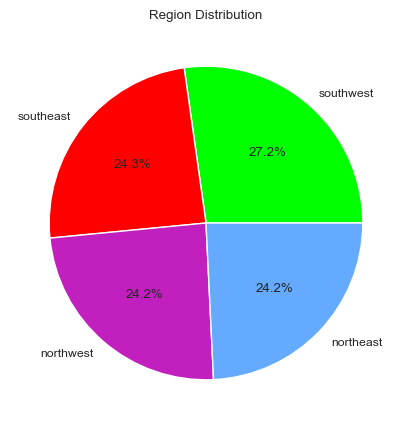

In [82]:
myCOlors =['#00FF00',"#FF0000","#C120BF","#64AAFF"]
myLabels = ['southwest','southeast','northwest','northeast']
plt.figure(figsize=(6,4))
plt.pie(df['region'].value_counts(),autopct='%1.1f%%',labels=myLabels,colors = myCOlors)
plt.title('Region Distribution')
plt.plot()

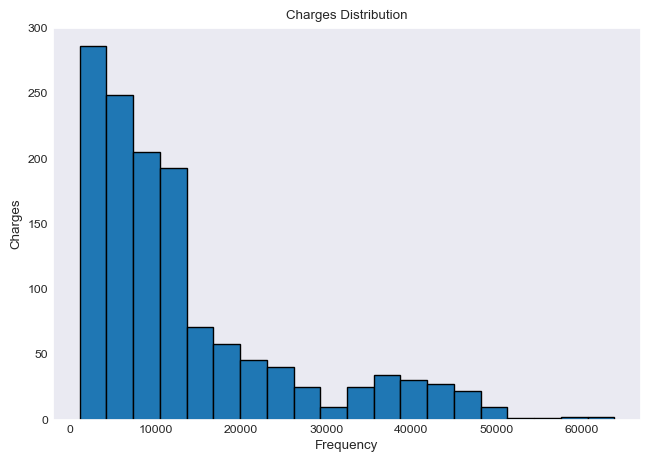

In [83]:
plt.figure(figsize=(6, 4))
plt.hist(df["charges"], bins=20, edgecolor="black")
plt.xlabel("Frequency")
plt.ylabel("Charges")
plt.title("Charges Distribution")
plt.show()

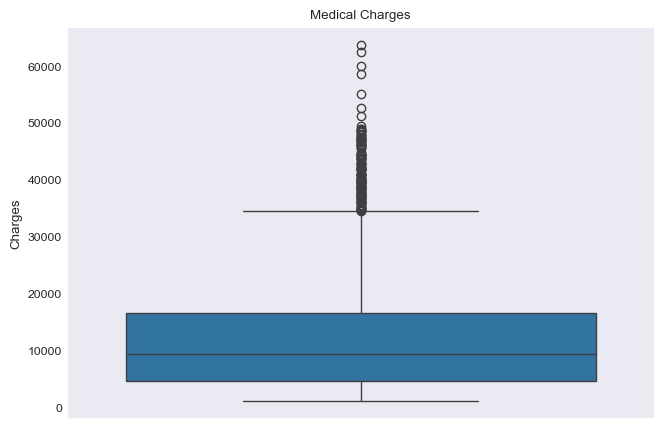

In [84]:
plt.figure(figsize=(6, 4))
sns.boxplot(data = df,y ='charges')
plt.ylabel("Charges")
plt.title("Medical Charges")
plt.show()

[]

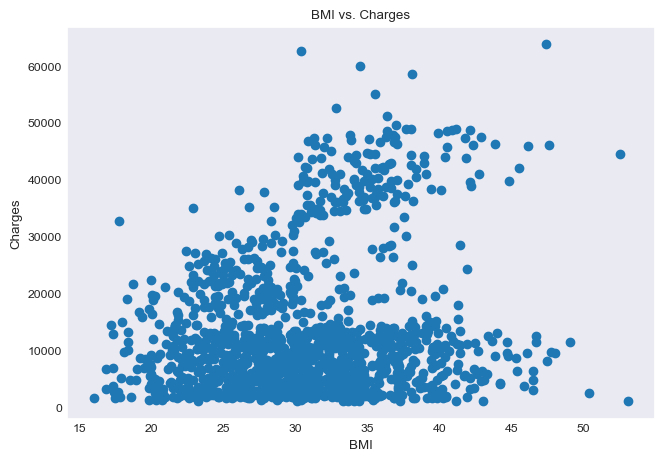

In [85]:
plt.figure(figsize=(6, 4))
plt.scatter(df['bmi'],df['charges'])
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs. Charges')
plt.plot()

[]

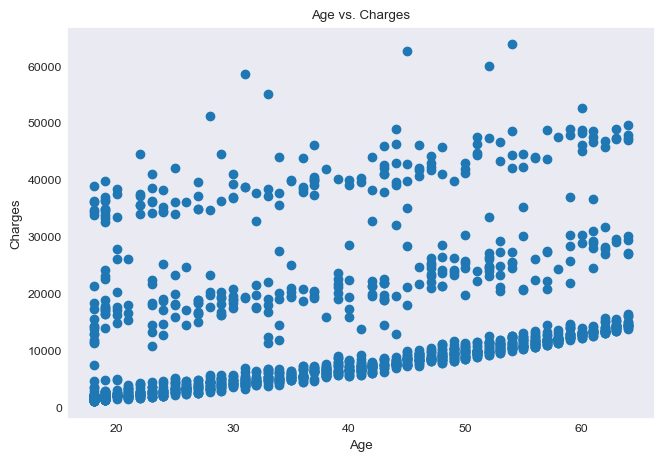

In [86]:
plt.figure(figsize=(6, 4))
plt.scatter(df['age'],df['charges'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs. Charges')
plt.plot()

[]

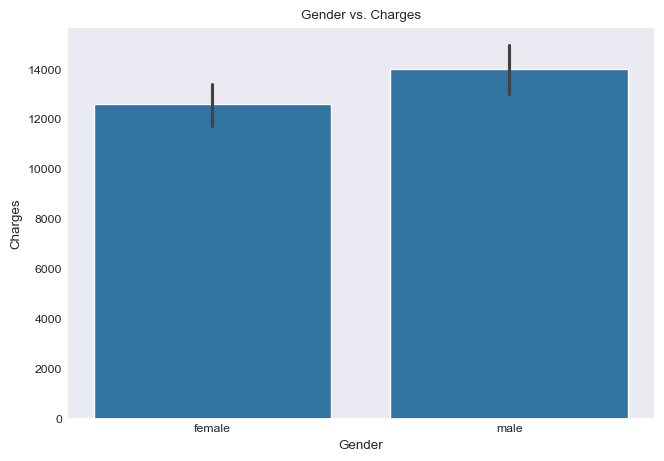

In [87]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x="sex", y="charges")
plt.xlabel("Gender")
plt.ylabel("Charges")
plt.title("Gender vs. Charges")
plt.plot()

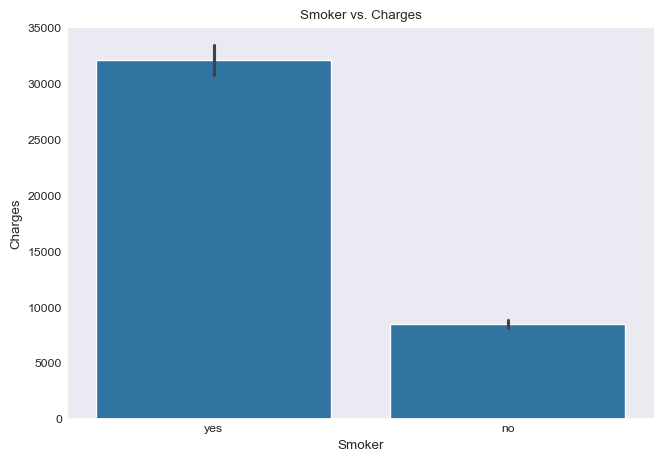

In [88]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='smoker', y='charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Smoker vs. Charges')
plt.show()

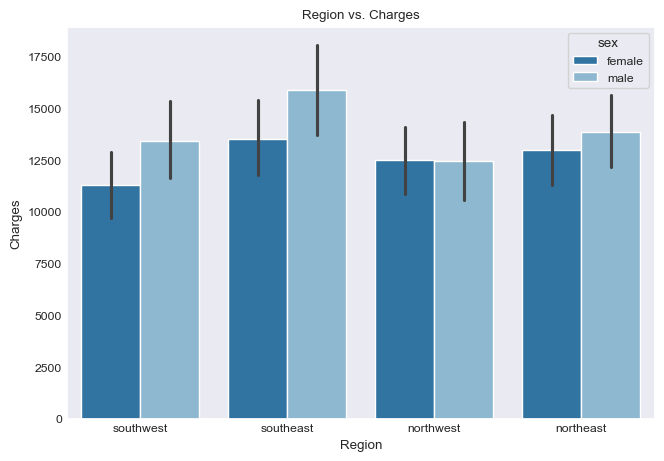

In [89]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='region', y='charges', hue='sex')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Region vs. Charges')
plt.show()

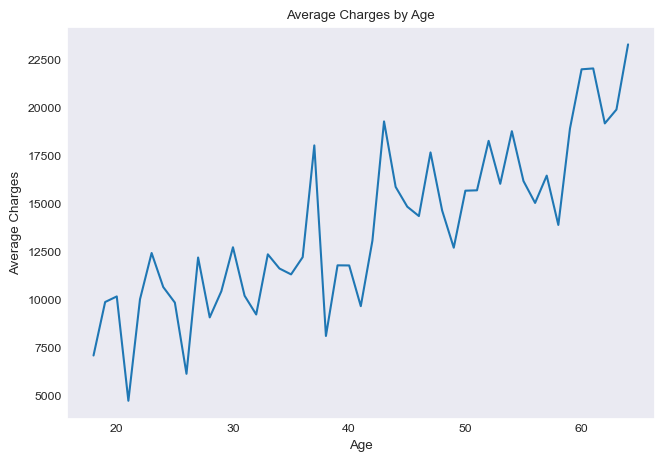

In [90]:
avg_charges_by_age = df.groupby("age")["charges"].mean()
plt.figure(figsize=(6, 4))
plt.plot(avg_charges_by_age.index, avg_charges_by_age.values)
plt.xlabel('Age')
plt.ylabel('Average Charges')
plt.title('Average Charges by Age')
plt.show()

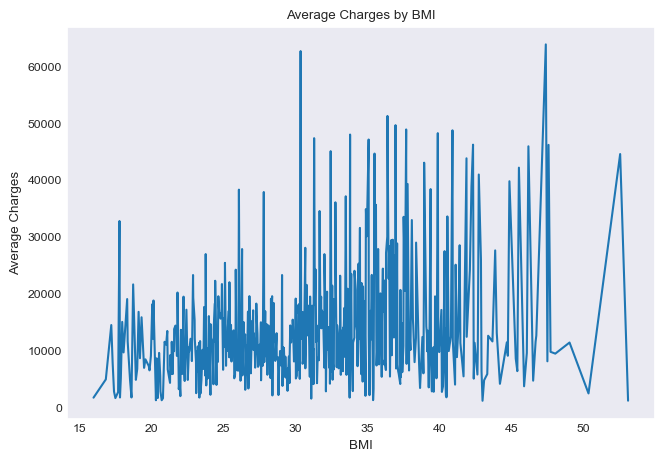

In [91]:
avg_charges_by_bmi = df.groupby('bmi')['charges'].mean()
plt.figure(figsize=(6, 4))
plt.plot(avg_charges_by_bmi.index, avg_charges_by_bmi.values)
plt.xlabel('BMI')
plt.ylabel('Average Charges')
plt.title('Average Charges by BMI')
plt.show()

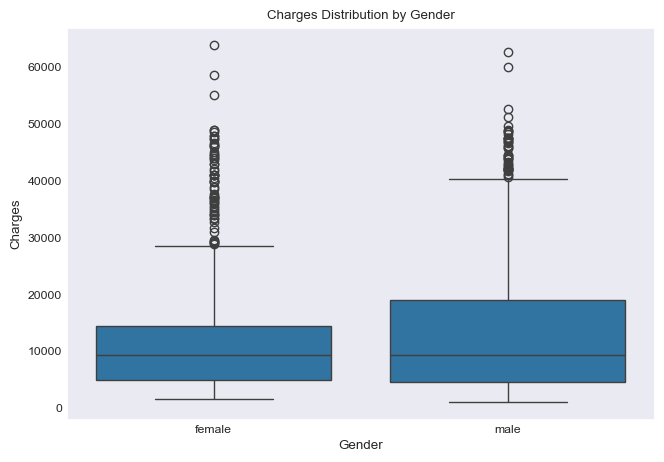

In [92]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='sex', y='charges')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.title('Charges Distribution by Gender')
plt.show()

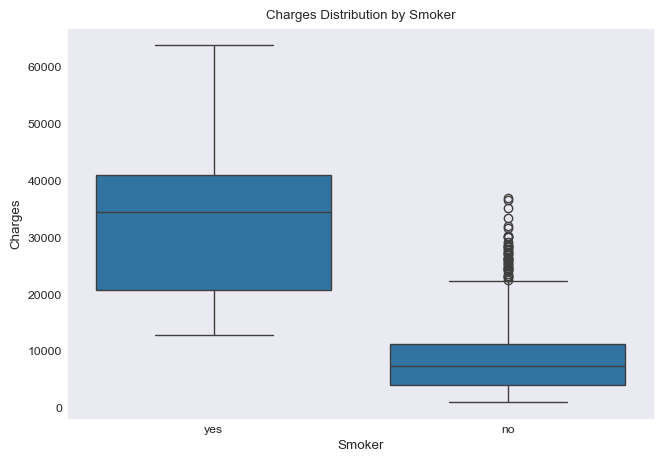

In [93]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='smoker', y='charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Charges Distribution by Smoker')
plt.show()

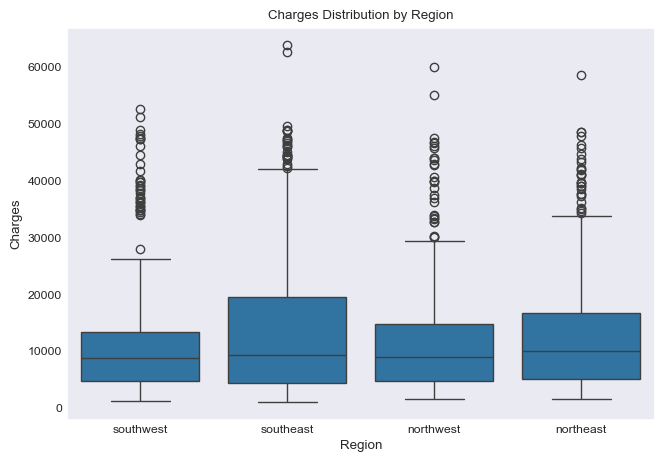

In [94]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='region', y='charges')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Charges Distribution by Region')
plt.show()

[]

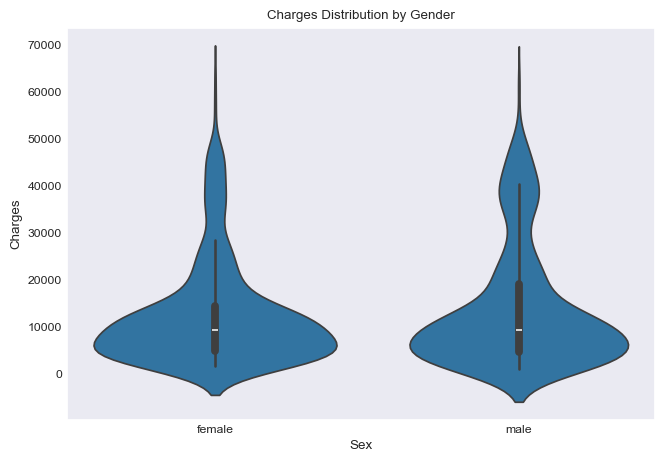

In [95]:
plt.figure(figsize = (6,4))
sns.violinplot(data=df,x = 'sex',y = 'charges')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.title('Charges Distribution by Gender')
plt.plot()

[]

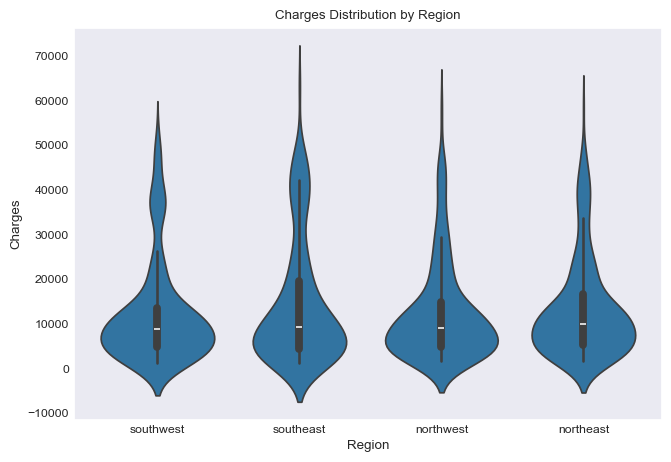

In [96]:
plt.figure(figsize = (6,4))
sns.violinplot(data=df,x = 'region',y = 'charges')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Charges Distribution by Region')
plt.plot()

[]

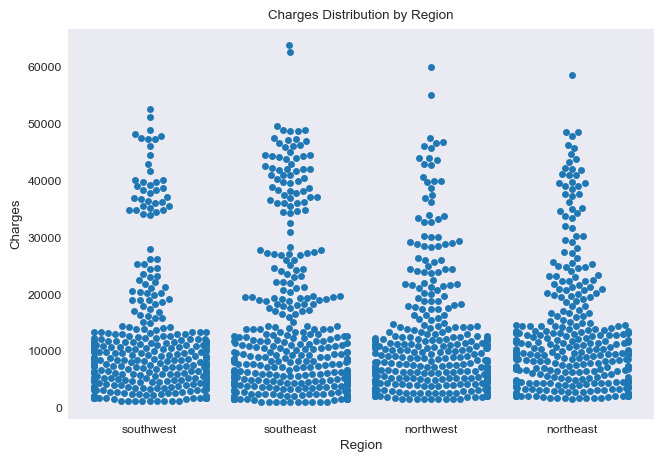

In [97]:
plt.figure(figsize = (6,4))
sns.swarmplot(data=df,x = 'region',y = 'charges')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Charges Distribution by Region')
plt.plot()

[]

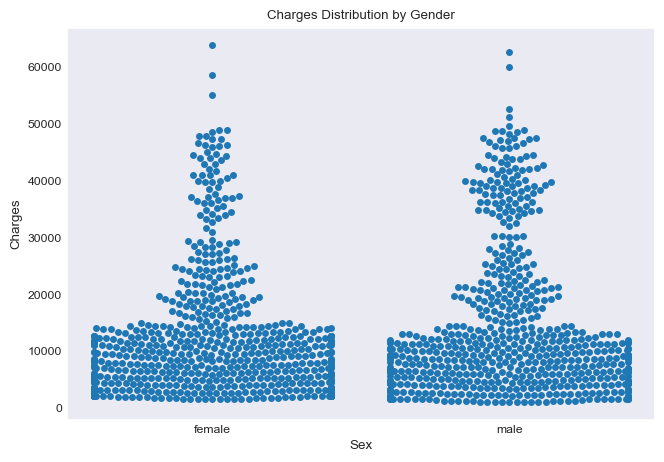

In [98]:
plt.figure(figsize = (6,4))
sns.swarmplot(data=df,x = 'sex',y = 'charges')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.title('Charges Distribution by Gender')
plt.plot()

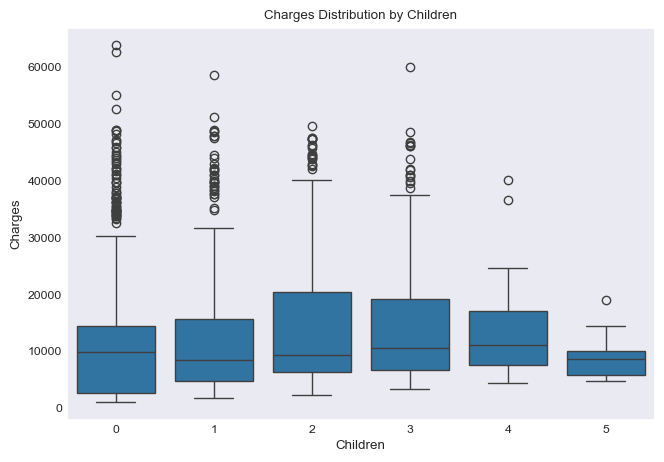

In [99]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='children', y='charges')
plt.xlabel('Children')
plt.ylabel('Charges')
plt.title('Charges Distribution by Children')
plt.show()

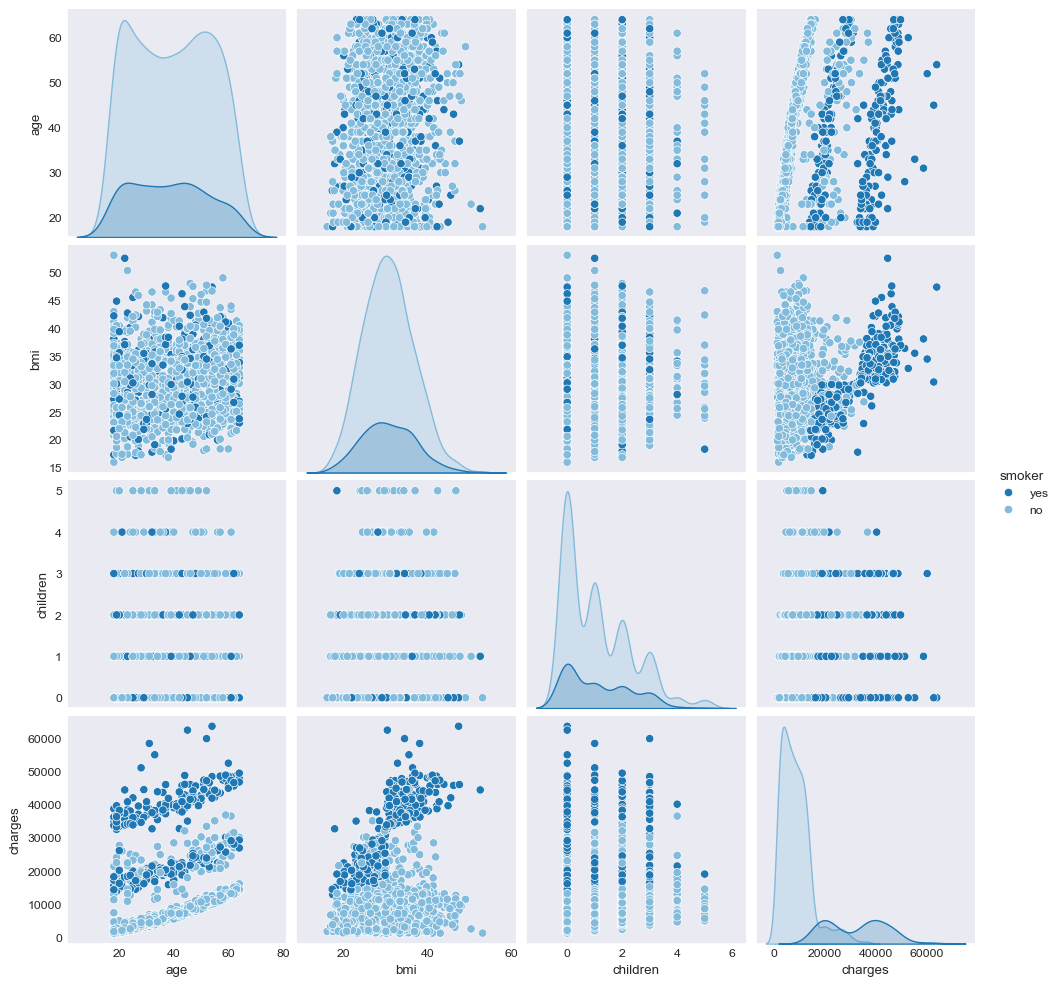

In [100]:
sns.pairplot(df, hue='smoker')
plt.show()

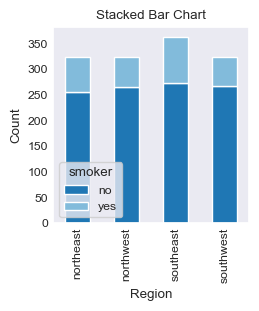

In [101]:
stacked_data = df.groupby(['region', 'smoker']).size().unstack()
stacked_data.plot(kind='bar', stacked=True)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Stacked Bar Chart')
plt.show()

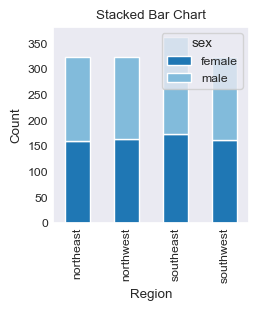

In [102]:
stacked_data = df.groupby(['region', 'sex']).size().unstack()
stacked_data.plot(kind='bar', stacked=True)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Stacked Bar Chart')
plt.show()

[]

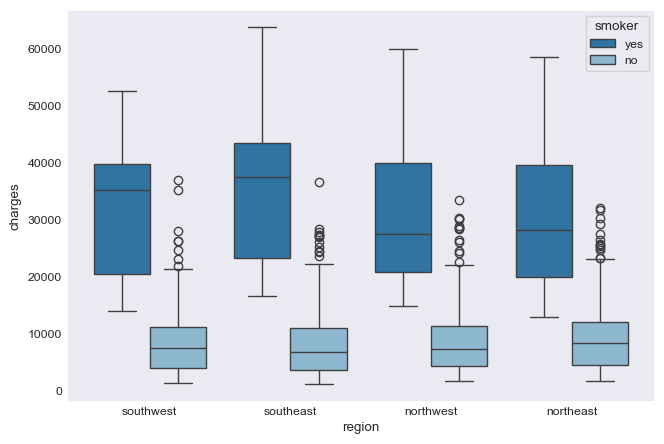

In [103]:
plt.figure(figsize=(6,4))
sns.boxplot(data = df,x = 'region',y = 'charges',hue='smoker')
plt.plot()

[]

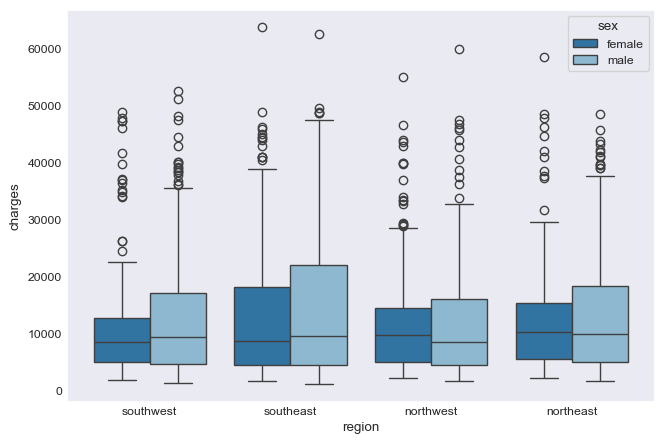

In [104]:
plt.figure(figsize=(6,4))
sns.boxplot(data = df,x = 'region',y = 'charges',hue='sex')
plt.plot()

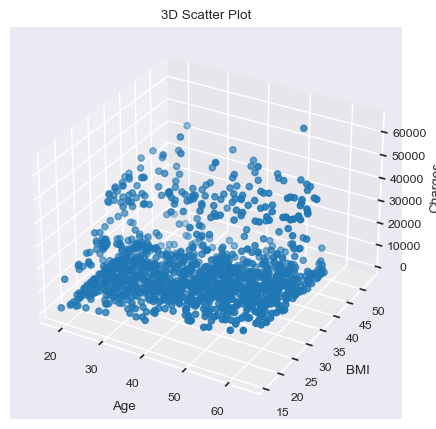

In [105]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'], df['bmi'], df['charges'])
ax.set_xlabel('Age')
ax.set_ylabel('BMI')
ax.set_zlabel('Charges')
plt.title('3D Scatter Plot')
plt.show()

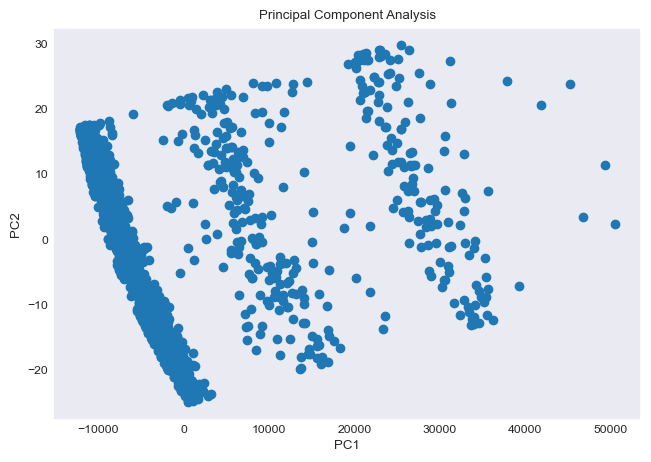

In [106]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df[['age','charges','bmi']])
df_pca = pd.DataFrame(data=principal_components,columns=['PC1','PC2'])
fig = plt.figure(figsize=(6, 4))
plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Component Analysis')
plt.show()

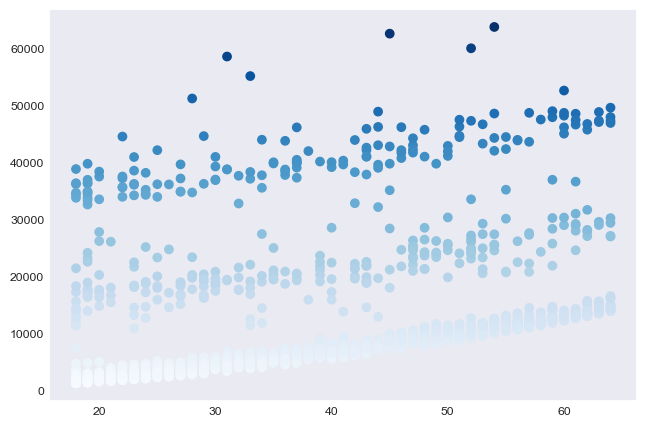

In [107]:
X = df[['age','bmi','charges']]
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(X)
plt.figure(figsize=(6,4))
plt.scatter(df['age'],df['charges'],c=df['charges'])
plt.show()

In [108]:
data = df.copy()
numerical_columns = ['age','bmi','charges']

data['smoker'] = data['smoker'].map({'yes':1,'no':0})
data['sex'] = data['sex'].map({'female':0,'male':1})
data['region'] = LabelEncoder().fit_transform(df['region'])

scaled_numerical = scaler.fit_transform(data[numerical_columns])
scaled_numerical_df = pd.DataFrame(data = scaled_numerical,columns=numerical_columns)
data.drop(columns = numerical_columns,inplace=True)
data = pd.concat([data,scaled_numerical_df],axis = 1)

[]

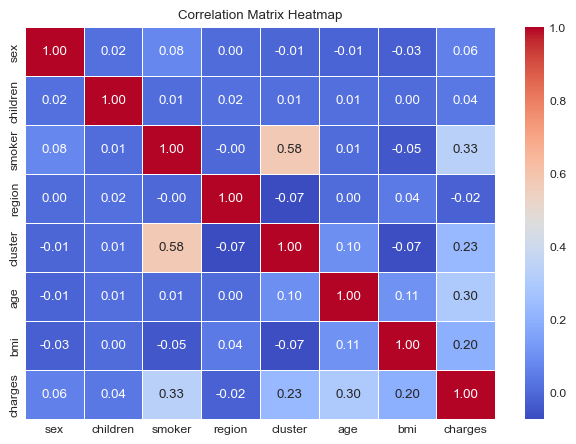

In [109]:
correlation_matrix = data.corr()
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidths=0.5,fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.plot()

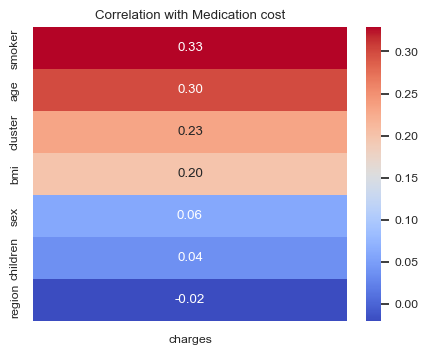

In [110]:
target_corr = correlation_matrix['charges'].drop('charges').sort_values(ascending=False)
plt.figure(figsize = (4,3))
sns.set_theme(font_scale=0.8)
sns.heatmap(target_corr.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Medication cost')
plt.show()

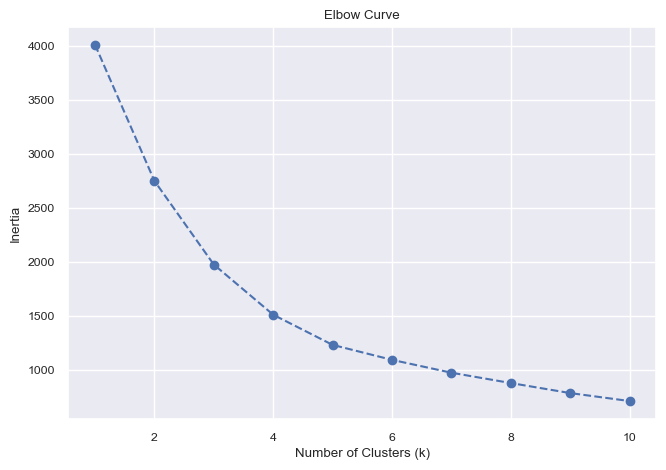

In [120]:
features = ['age', 'bmi', 'charges']
categorical_features = ['sex', 'smoker']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)
X = df_encoded[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

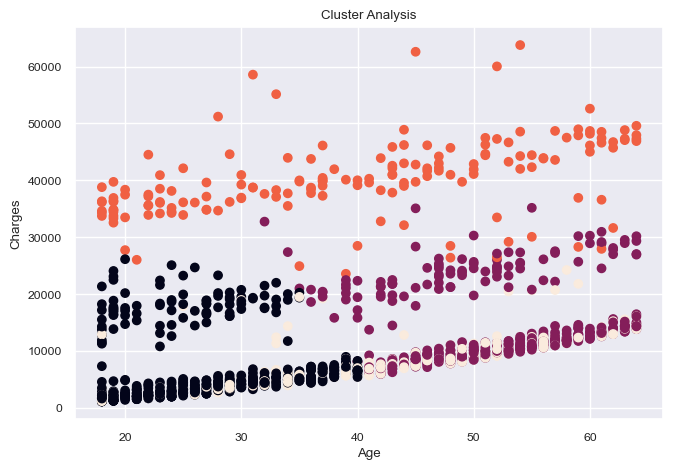

In [128]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_scaled)
labels = kmeans.labels_
df['cluster'] = labels

plt.figure(figsize=(6,4))
plt.scatter(df['age'],df['charges'],c=df['cluster'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Cluster Analysis')
plt.show()